# SVM: support vector machine
1)
- Perceptron: 판별 경계선 무수함
- 최전방 Most frot data를 통해 margin 확보
- 각 클래스의 support
    - $x^+$
        - 정규화 $f(x^+)=w^Tx^+ - w_0 = 1$
    - $x^-$
        - 정규화 $f(x^-)=w^Tx^- - w_0 = -1$
    - margin
        - $\dfrac{w^Tx^+ - w_0}{\| w \|} - \dfrac{w^Tx^- - w_0}{\| w \|} = \dfrac{2}{\|w\|}$
        
        

2)
- 목적함수: margin 최소화 + 분류 만족
    $$L = \dfrac{1}{2}w^Tw - \sum_{i=1}^N a_i \{y_i \cdot (w^Tx_i - w_0)-1\}$$
        
        
- Dual form
    - target:w -> a 
        $$ L = \sum_{i=1}^N a_i - 
        \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j 
        $$
        
        
- 판별함수: support vector와 test cos유사도 계산
    - $f(x) = w^Tx - w_0 = \sum_{i=1}^N a_i y_i x_i^Tx - w_0$

### Slack 변수
- linear separable하지 않은 경우 slack변수 사용, 개별적 오차 허용
- 양수 슬랙변수 $\xi \geq 0$
    - +1 class: $w^Tx_x - w_0 \geq +1 -\xi_i$
    - -1 class: $w^Tx_x - w_0 \leq +1 +\xi_i$
- 목적함수
    - $C \sum_{i=1}^N \xi_i \rightarrow$ 슬랙변수 합 커지지 않도록 제한
        - 슬랙변수가 커지면 경계선을 넘어감
        
$$
L = \dfrac{1}{2} w^Tw - \sum_{i=1}^N a_i\{y_i \cdot (w^Tx_i - w_0)-1 + \xi_i\} - \sum_{i=1}^N \mu_i \xi_i + C \sum_{i=1}^N \xi_i
$$
    
    

### Scikit-Learn
- `n_support`
- `spport_`: 서포트 벡터 인덱스
- `support_vectors_`: 각 클래스의 서포트의 x값
- `coef_`
- `intercept_`
- `dual_coef_`: 각 원소가 $a_i \cdot y_i$로 이루어진 벡터

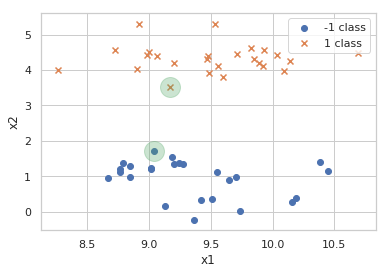

In [6]:
# 데이터 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y -1

# 모델 생성
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)
support = model.support_vectors_

# plotting
plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', label='-1 class')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x', label='1 class')
plt.scatter([support[0,0], support[1,0]], [support[0,1], support[1,1]], 
            alpha=0.3, s=400)

plt.xlabel('x1'); plt.ylabel('x2')
plt.legend()
plt.show()

### 슬랙변수 가중치의 영향

              precision    recall  f1-score   support

           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

   micro avg       0.95      0.95      0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100


[[47  3]
 [ 2 48]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

   micro avg       0.94      0.94      0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


[[47  3]
 [ 3 47]]


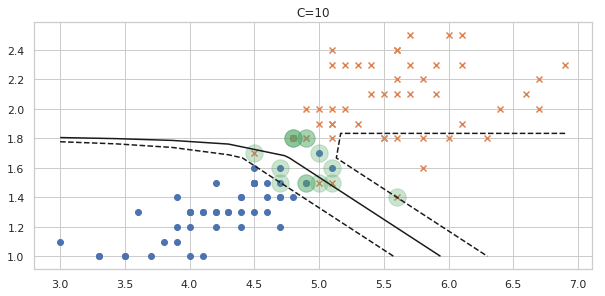

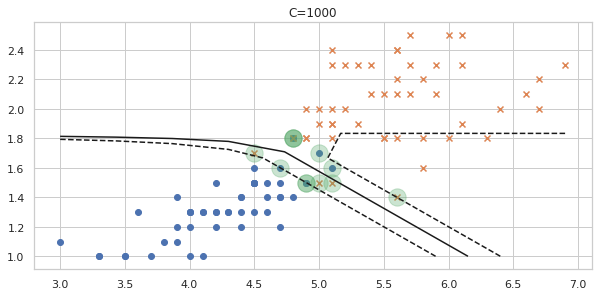

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
y = iris.target[idx]
X = iris.data[idx, 2:]

x1min = X[:, 0].min()
x1max = X[:, 0].max()
x2min = X[:, 1].min()
x2max = X[:, 1].max()
xx1 = np.linspace(x1min, x1max, 10)
xx2 = np.linspace(x2min, x2max, 10)
X1, X2 = np.meshgrid(xx1, xx2)

linestyles = ['dashed', 'solid', 'dashed']
levels = [-1, 0, 1]
pltnum = 1

for name, penalty in (('C=10', 10), ('C=1000', 1000)):
    model = SVC(kernel='linear', C=penalty).fit(X, y)
    Z = np.empty(X1.shape)
    
    for (i, j), val in np.ndenumerate(X1[:5]):
        x1 = val
        x2 = X2[i, j]
        p = model.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    
    plt.figure(figsize=(10,10))
    plt.subplot(2, 1, pltnum)
    plt.scatter(X[y == 1, 0], X[y ==1, 1], marker='o', label="Setosa")
    plt.scatter(X[y == 2, 0], X[y ==2, 1], marker='x', label="Versicolour")
    plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
    plt.title(name)
    print(classification_report(y, model.predict(X)))
    print()
    print(confusion_matrix(y, model.predict(X)))

plt.show()